In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
I = np.eye(2)
X = np.array([[0,1], [1,0]])
Y = np.array([[0,-1j], [1j,0]])
Z = np.diag([1,-1])
Paulis = [I, X, Y, Z]

ket_0 = np.array([[1], [0]])
ket_1 = np.array([[0], [1]])
ket_plus = np.array([[1], [1]]) / np.sqrt(2)
ket_minus = np.array([[1], [-1]]) / np.sqrt(2)
ket_iplus = np.array([[1], [1j]]) / np.sqrt(2)
ket_iminus = np.array([[1], [-1j]]) / np.sqrt(2)

pauli_eigenbases = [ket_0, ket_1, ket_plus, ket_minus, ket_iplus, ket_iminus]

H = np.array([[1,1], [1,-1]]) / np.sqrt(2)
S = np.diag([1, 1j])

In [4]:
result = 0 + 0j
for eigvector in [ket_plus, ket_minus]:
    post_measurement =  np.outer(eigvector, eigvector.conj())
    result += np.kron(post_measurement, post_measurement)
print(result.real)

[[0.5 0.  0.  0.5]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]]


In [5]:
result = 0 + 0j
for eigvector in pauli_eigenbases:
    post_measurement =  np.outer(eigvector, eigvector.conj())
    result += np.kron(post_measurement, post_measurement)
print(result.real)

[[2. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]]


In [ ]:
def identity_channel(rho):
    return rho

def depolarizing_channel(rho, p):
    return p * rho + (1-p) * np.trace(rho) * np.eye(2)/2

def measurement_channel(rho):
    result = 0 + 0j
    for eigvector in pauli_eigenbases:
        result += np.trace(rho @ np.outer(eigvector, eigvector.conj())) * np.outer(eigvector, eigvector.conj())
    result /= 3
    return result

def evolve_with_X(rho):
    return X @ rho @ X.conj().T

def evolve_with_H(rho):
    return H @ rho @ H.conj().T

channel_matrix_rep = np.zeros((4,4), dtype=np.complex128)

for i, Pi in enumerate(Paulis):
    for j, Pj in enumerate(Paulis):
        channel_matrix_rep[i,j] = np.trace(Pi @ evolve_with_H(Pj))
channel_matrix_rep /= 2
    
np.round(channel_matrix_rep.real, 5)

array([[ 1.,  0.,  0., -0.],
       [-0.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.]])

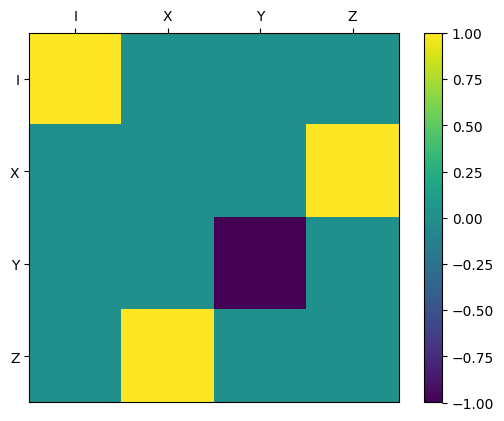

In [26]:
fig, ax = plt.subplots()
im = ax.imshow(channel_matrix_rep.real)
ax.set_xticks(np.arange(0,4), ['I', 'X', 'Y', 'Z'])
ax.set_yticks(np.arange(0,4), ['I', 'X', 'Y', 'Z'])
ax.xaxis.tick_top()
fig.colorbar(im)
plt.show()